## July update

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

outputfilename1="../Data/CIC/Monday-WorkingHours_activity.csv"
outputfilename2="../Data/CIC/Monday-WorkingHours_activity_sampled.csv"
pd.set_option('display.max_columns', 20)
Flows=pd.read_csv(outputfilename1)
Flows_sampled=pd.read_csv(outputfilename2)
Title="ABC"

values=[0,6,12,18,24,30]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

Hosts=["192.168.10.3","192.168.10.50","192.168.10.51","192.168.10.19","192.168.10.9","192.168.10.25"]


#### Regular hosts from CICIDS-data

For all discussed hosts, I sorted all packets into an incoming stream (packets with destination IP of the host), and outgoing stream (source IP is the host), once with all packets and once when packets are sampled at a 1:1000 rate (i.e. 99,9% of all packets are thrown away to simulate the view of an ISP). I chose this way of grouping streams instead of incoming and outgiong connections since in the sampled view, we would not be able to identify which packet belongs to an incoming connection or not. It is thinkable that we could group streams in a smarter way when looking at the destination and source port, which might reveal more regarding the direction of the stream and the functionality of the proxy. However, this would require some additional assumptions about the proxy, which we do not want to make at this moment.

I binned the packets into 3 minute interval bins, and plotted the incoming stream and outgoing stream against each other for both counted number of packets, and number of bytes in each bin. I also calculated the Pearson correlation between the two streams due to our hypothesis that the incoming and outgoing stream should show significantly more correlation than regular hosts.

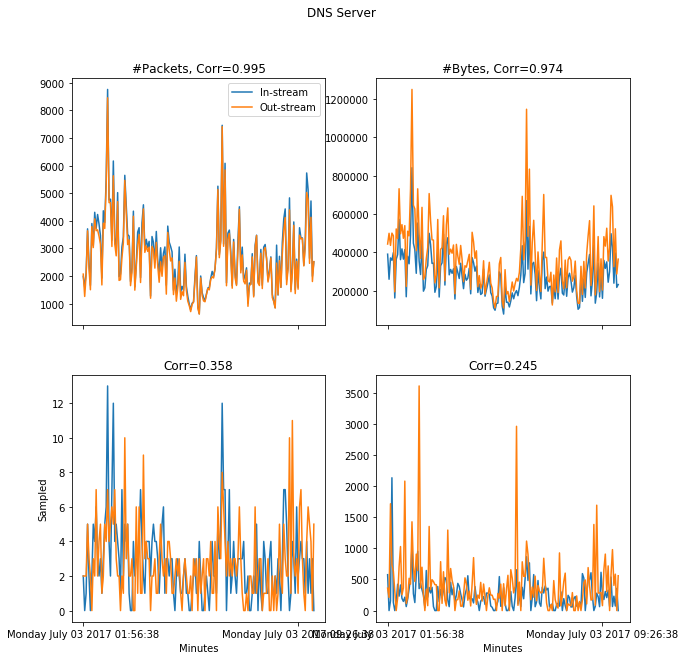

In [2]:
f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('DNS Server')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

Above are plots for a DNS server, which shows very heavy correlation for both streams, which is to be expected from its functionality. Interestingly, when looking at the sampled view, the correlation is not measurable in such a strong way.

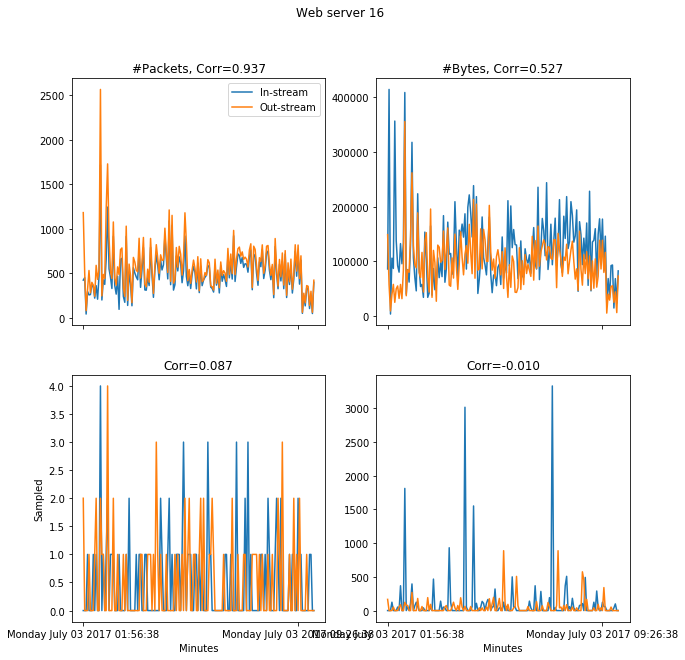

In [3]:
values=[0,6,12,18,24,30]
values=[x+1 for x in values]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('Web server 16 ')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

Above are plots for a Web server. We see very strong correlation in the packet number stream, but not as much in the byte stream. Overall, due to the nature of the TCP-packet-acknowledgement system, I would expect the packet number stream to be strongly correlated for every host using predominantly TCP. In the sampled view, we measure almost no correlation for either metric, however this is likely due to the fact that the server is not very active and is not receiving enough packets for the correlation signal to persist in the sampled view.

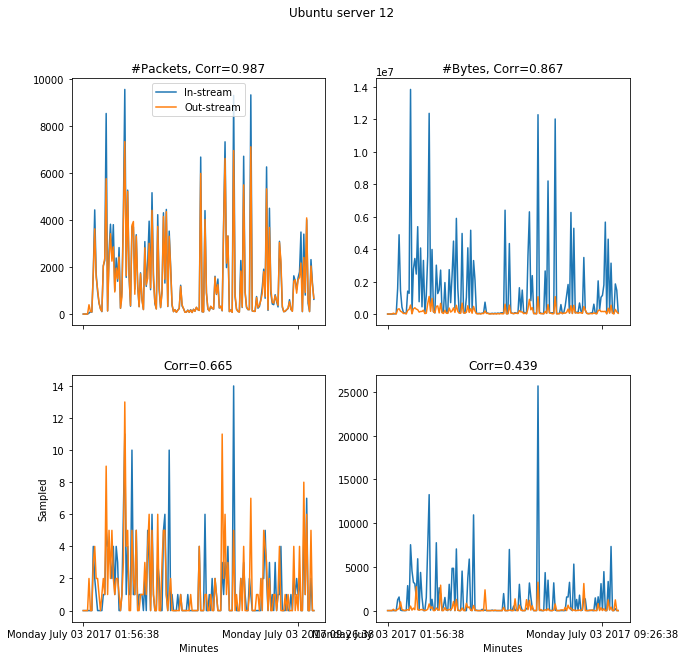

In [4]:
values=[0,6,12,18,24,30]
values=[x+2 for x in values]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('Ubuntu server 12')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

This server sees more activity and also more correlation in the byte stream, which is however still clearly below the packet stream correlation. For the sampled view, we measure moderate correlation of both metrics, since the activity rate is higher. 

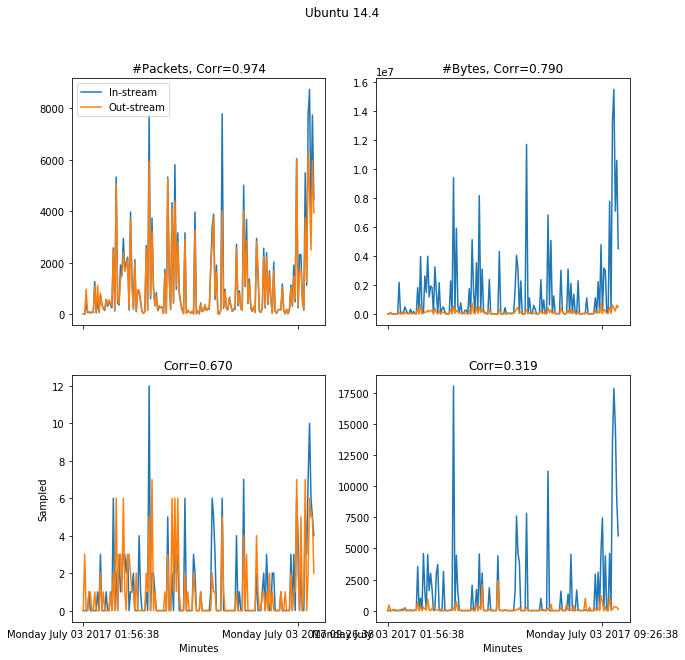

In [5]:
values=[0,6,12,18,24,30]
values=[x+3 for x in values]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('Ubuntu 14.4')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

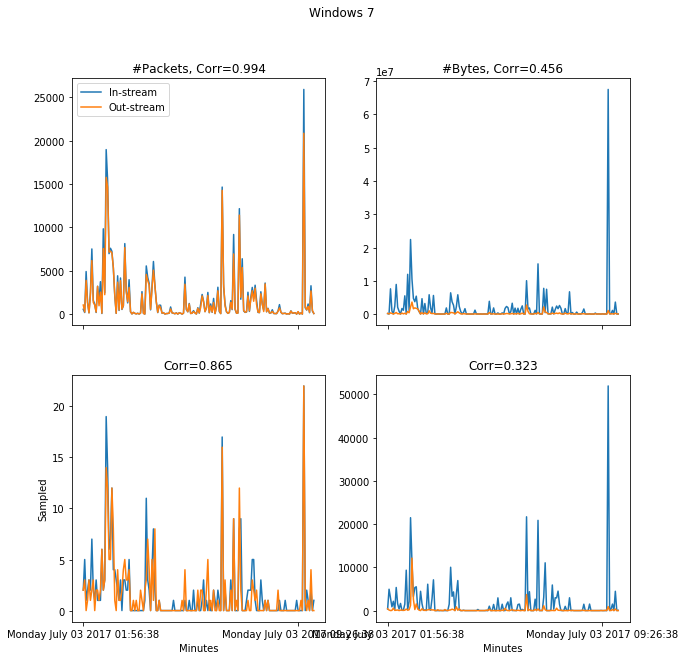

In [6]:
values=[0,6,12,18,24,30]
values=[x+4 for x in values]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('Windows 7')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

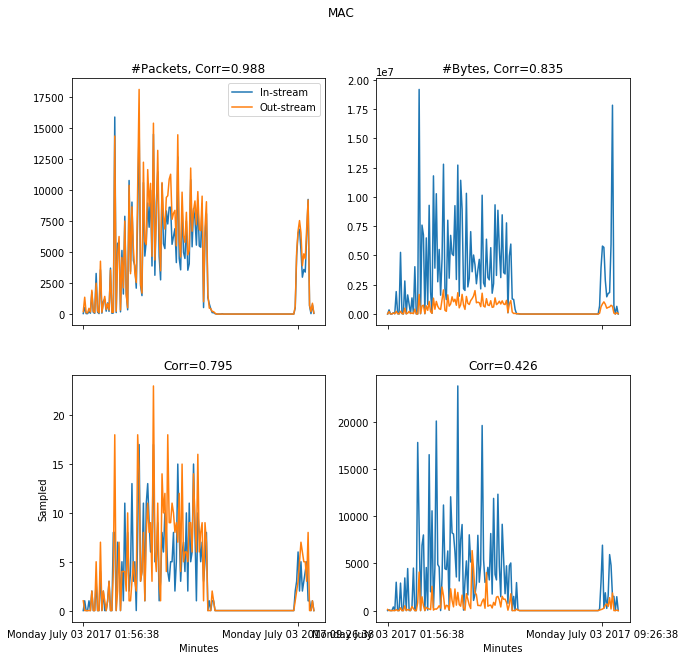

In [7]:
values=[0,6,12,18,24,30]
values=[x+5 for x in values]
values.extend([36])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('MAC')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

Plots above are now for personal computers, but show a very similar picture to the server above regarding byte stream correlation and visible correlation under sampling.

## July Proxy data

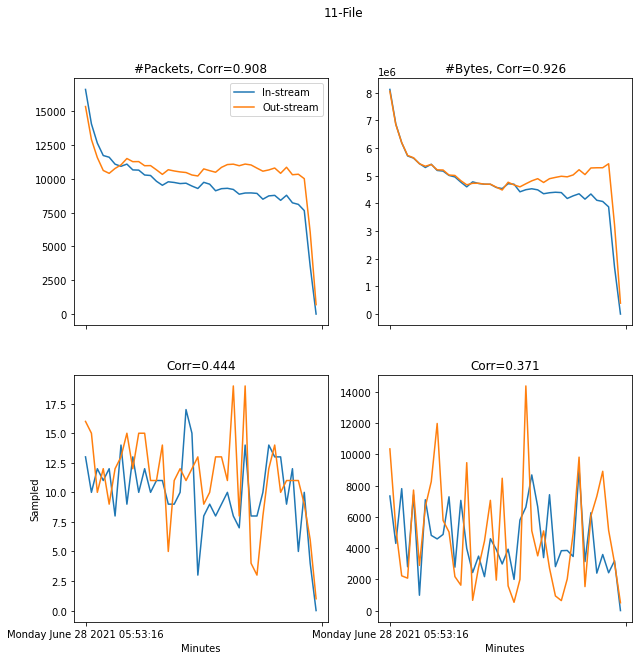

In [3]:
outputfilename1="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-11.txt"
outputfilename2="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-11_sample.txt"

Flows=pd.read_csv(outputfilename1)
Flows_sampled=pd.read_csv(outputfilename2)

values=[0,1,2,3,4,5]
values.extend([6])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]
f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('11-File')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

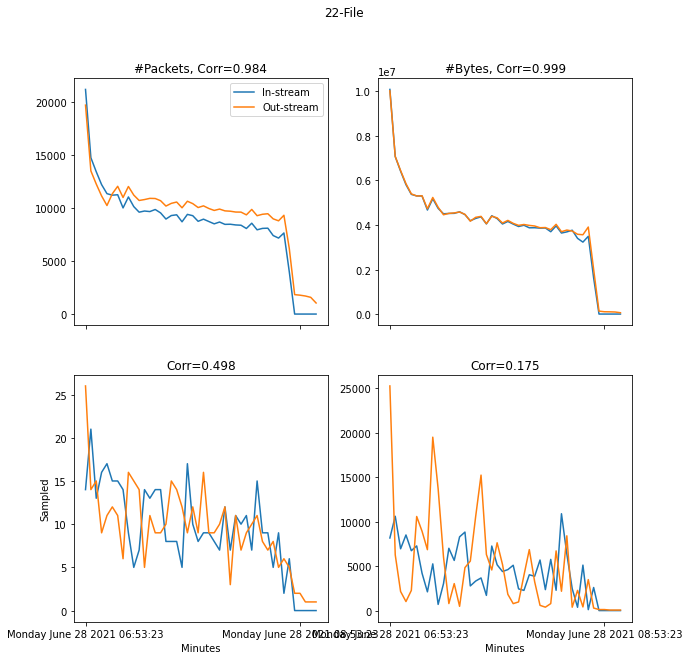

In [5]:
outputfilename1="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-22.txt"
outputfilename2="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-22_sample.txt"

Flows=pd.read_csv(outputfilename1)
Flows_sampled=pd.read_csv(outputfilename2)

Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('22-File')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

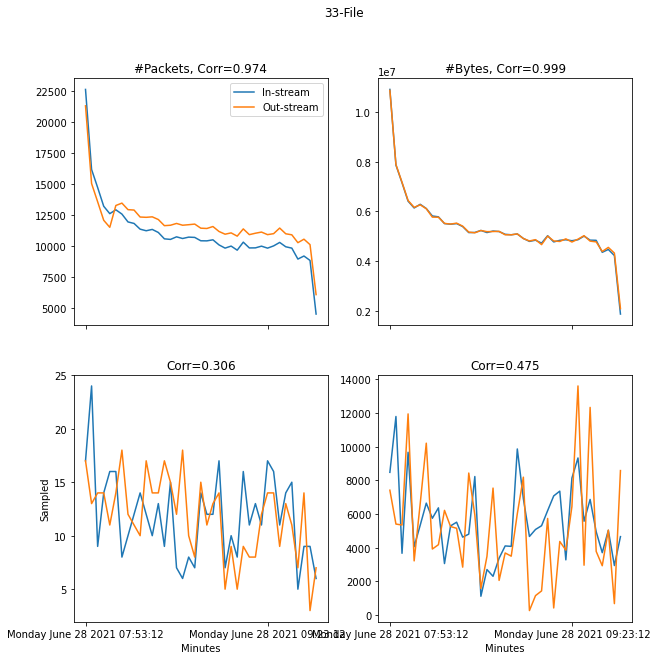

In [6]:
outputfilename1="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-33.txt"
outputfilename2="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-33_sample.txt"

Flows=pd.read_csv(outputfilename1)
Flows_sampled=pd.read_csv(outputfilename2)

values=[0,1,2,3,4,5]
values.extend([6])
Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]
f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('33-File')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

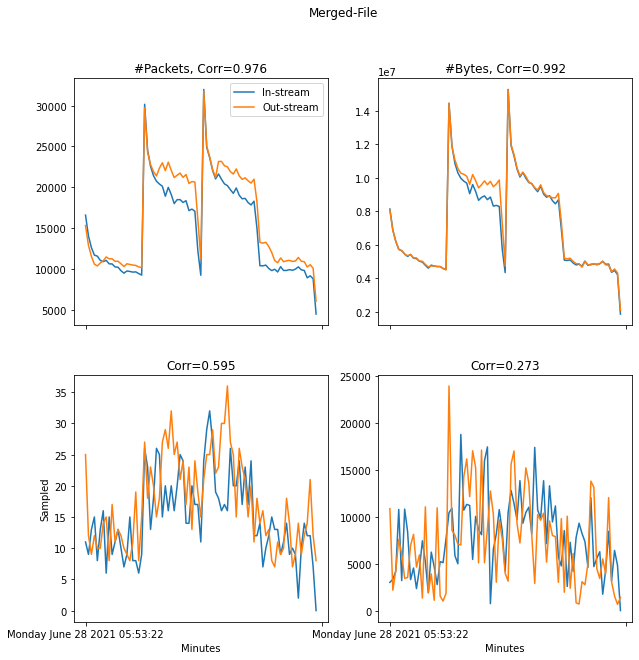

In [9]:
outputfilename1="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-merged.txt"
outputfilename2="Data_Adi/Data_June/Client-Server-Stepping-Stone-big-payloads-merged_sample.txt"

Flows=pd.read_csv(outputfilename1)
Flows_sampled=pd.read_csv(outputfilename2)

Host1=Flows.iloc[:,values]
Host1_sampled=Flows_sampled.iloc[:,values]

f, axs = plt.subplots(2, 2, sharex=True)
f.suptitle('Merged-File')
f.set_figheight(10)
f.set_figwidth(10)
x1=Host1.iloc[:,0]
x2=Host1.iloc[:,1]
axs[0, 0].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 0].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 0].set_title("#Packets, Corr=%.3f" %pearsonr(x1, x2)[0])
axs[0, 0].legend()
###########################
x1=Host1_sampled.iloc[:,0]
x2=Host1_sampled.iloc[:,1]
axs[1, 0].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 0].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 0].set_xlabel("Minutes")
axs[1, 0].set_ylabel("Sampled")
axs[1, 0].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(1))

x1=Host1.iloc[:,2]
x2=Host1.iloc[:,3]
axs[0, 1].plot(Host1.iloc[:,6],x1, label="In-stream")
axs[0, 1].plot(Host1.iloc[:,6],x2, label="Out-stream")
axs[0, 1].set_title("#Bytes, Corr=%.3f" %pearsonr(x1, x2)[0])
#ax3.legend()
x1=Host1_sampled.iloc[:,2]
x2=Host1_sampled.iloc[:,3]
axs[1, 1].plot(Host1_sampled.iloc[:,6],x1, label="In-stream")
axs[1, 1].plot(Host1_sampled.iloc[:,6],x2, label="Out-stream")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_title("Corr=%.3f" %pearsonr(x1, x2)[0])
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(1))

The plots above now show the same metrics for the new data with longer payloads. In comparison to the previous data from May, the byte streams are now very similar and measure a close to perfect correlation, which is what should be expected from a simple proxy. The byte stream correlation in the non-sampled view is much stronger than for benign hosts, and should therefore in principle be a suitable indicator for proxy behaviour. Packet number correlation is very strong, but this is also the case for benign hosts, so we should probably focus on the byte-streams.

However, we do not measure very strong correlation in the sampled view. Possible explanations for this is that we do not see large spikes in the activity, which can increase the measured correlation due to the quadratic term in the correlation measurement. It could also be that we do not see enough packets to have a strong signal in the sampled view, which is probably something we would see in real-world as well. This ties in a bit with the empirical assumptions we can make on the proxies.

I will investigate more how we can improve the signal we see in the sampled view, and which characteristics are important. I think the data is fine for the moment, and the ball is in my court to improve our detection metrics. One thing that would be useful to know is why the activity level for all files drops by about half from the start of the capture, and why the streams are diverging quite a bit at the end for the 11-file.
